In [1]:
import numpy as np
import matplotlib.pyplot as plt
from scipy.optimize import curve_fit

In [2]:
def gauss (x, A, mean, sig):
    '''
    Retruns a gaussian profile
    '''
    gaussian = (A/(sig*np.sqrt(2*np.pi)))*np.exp((-pow((x-mean), 2.0)/(2*pow(sig, 2.0))))
    return gaussian

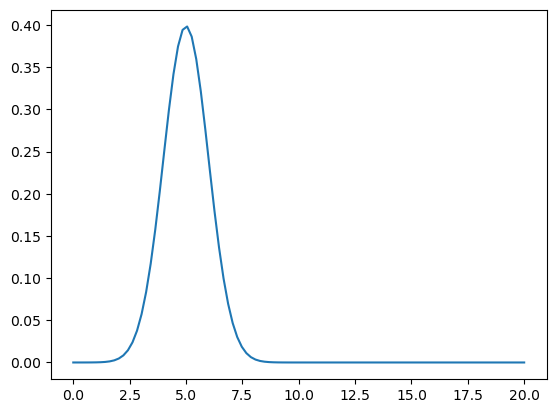

In [3]:
x_test = np.linspace(0,20, 100)
gauss_test = gauss(x_test, 1.0, 5, 1.0)

plt.plot(x_test, gauss_test)
plt.show()

In [4]:
def nonlinear_func_real(x_vals, amp1, amp2, m1, m2, w1, cont):
    '''
    Combines two gaussians into one simulatred model spectrum
    '''
    return gauss(x_vals, amp1, m1, w1) + gauss(x_vals, amp2, m2, w1) + cont

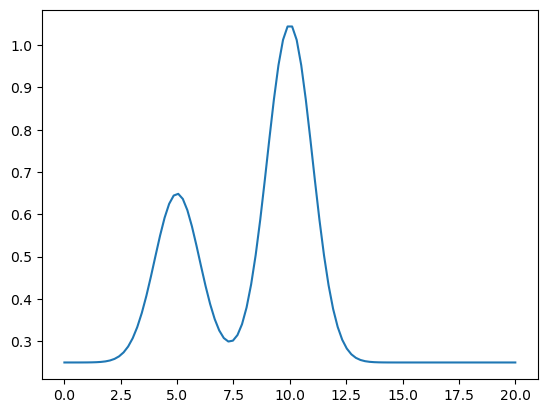

In [5]:
x_test2 = np.linspace(0,20, 100)
y_val_test = nonlinear_func_real(x_test2, 1.0, 2.0, 5, 10, 1.0, 0.25)
plt.plot(x_test2, y_val_test)
plt.show()

In [6]:
def fit_data(wave, spec, amp1, amp2, m1, m2, w1, cont):
    '''
    fits 2 gaussian profiles to a spectrum to dettermine the amplittudes, line centers, widths, and continum level of the input spectrum
    '''
    
    print('=====================================')
    print('Performing a least squares fit...')

    popt, pcov = curve_fit(nonlinear_func_real, wave, spec, p0=[amp1, amp2, m1, m2, w1, cont])

    errs = np.sqrt(np.diag(pcov))
    print('=====================================')
    print('Printing out the best fitting parameters ad 1 std errors...')
    print('-------------------------------------')
    print('line 1 Amp: ' + str(popt[0])+ ' Amp_err: ' +str(errs[0])+'\n')
    print('line 2 Amp: ' + str(popt[1])+ ' Amp_err: ' +str(errs[1])+'\n')
    print('line 1 Wavelength: ' + str(popt[2])+ ' Mean_4959_err: ' +str(errs[2])+'\n')
    print('line 2 Wavelength: ' + str(popt[3])+ ' Mean_5007_err: ' +str(errs[3])+'\n')
    print('line width: ' + str(popt[4])+ ' Sigma_err: ' +str(errs[4])+'\n')
    print('Continuum level: ' + str(popt[5])+ ' Cont_err: ' +str(errs[5])+'\n')

    print('=====================================')
    print('Plotting the observerd and modeled data...')
    y_model = nonlinear_func_real(wave, *popt)

    plt.plot(wave, spec, label='data')
    plt.plot(wave, y_model, label='model')
    plt.vlines(popt[2], ymin=0.0, ymax=spec.max(), linestyles='--', alpha=0.75, linewidth=1.0)
    plt.vlines(popt[3], ymin=0.0, ymax=spec.max(), linestyles='--', alpha=0.75, linewidth=1.0)

    plt.legend()
    plt.show()

    return popt, pcov


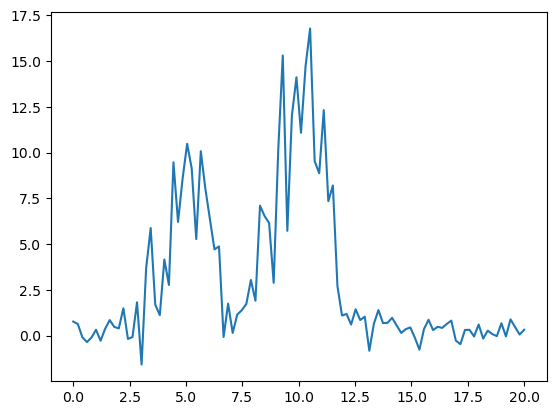

In [7]:
wave_test = np.linspace(0,20, 100)
pure_model = nonlinear_func_real(wave_test, 20.0, 40.0, 5, 10, 1.0, 0.25)
func_test_ = pure_model + np.random.normal(loc=0, scale = np.sqrt(pure_model), size=len(pure_model))

plt.plot(wave_test, func_test_)
plt.show()

Performing a least squares fit...
Printing out the best fitting parameters ad 1 std errors...
-------------------------------------
line 1 Amp: 21.441927976019926 Amp_err: 1.8910536812815886

line 2 Amp: 35.30932804785815 Amp_err: 2.107724036671032

line 1 Wavelength: 5.183295599330168 Mean_4959_err: 0.09913708831815886

line 2 Wavelength: 10.113914869180709 Mean_5007_err: 0.06010450364075211

line width: 1.0351486884503271 Sigma_err: 0.054830759443452455

Continuum level: 0.25645314023538196 Cont_err: 0.23852163889060857

Plotting the observerd and modeled data...


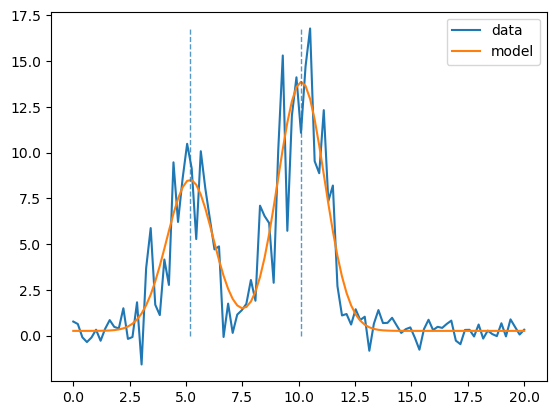

In [8]:
out_popt, out_pcov = fit_data(wave_test, func_test_, 15, 33.5, 5, 10, 2.5, 3)

In [9]:
def get_redshift(lamo, lame):
    '''
    return to redshift of a souce
    given the observed and rest frame
    wavelengths
    '''
    return (lamo-lame)/lame

In [10]:
get_redshift(5007, 5007)

0.0

In [11]:
from astropy.io import fits
import scipy.signal

In [12]:
hdul = fits.open(r'D:\KULIAH\Semester 7\Metode Numerik dalam Astrofisika\redshift\spec-1678-53433-0425.fits')
print(hdul[1].columns)

ColDefs(
    name = 'flux'; format = 'E'
    name = 'loglam'; format = 'E'
    name = 'ivar'; format = 'E'
    name = 'and_mask'; format = 'J'
    name = 'or_mask'; format = 'J'
    name = 'wdisp'; format = 'E'
    name = 'sky'; format = 'E'
    name = 'model'; format = 'E'
)


In [13]:
hdul[2].columns

ColDefs(
    name = 'SURVEY'; format = '6A'
    name = 'INSTRUMENT'; format = '4A'
    name = 'CHUNK'; format = '16A'
    name = 'PROGRAMNAME'; format = '23A'
    name = 'PLATERUN'; format = '16A'
    name = 'PLATEQUALITY'; format = '8A'
    name = 'PLATESN2'; format = 'E'
    name = 'DEREDSN2'; format = 'E'
    name = 'LAMBDA_EFF'; format = 'E'
    name = 'BLUEFIBER'; format = 'J'
    name = 'ZOFFSET'; format = 'E'
    name = 'SNTURNOFF'; format = 'E'
    name = 'NTURNOFF'; format = 'J'
    name = 'SPECPRIMARY'; format = 'B'
    name = 'SPECLEGACY'; format = 'B'
    name = 'SPECSEGUE'; format = 'B'
    name = 'SPECSEGUE1'; format = 'B'
    name = 'SPECSEGUE2'; format = 'B'
    name = 'SPECBOSS'; format = 'B'
    name = 'BOSS_SPECOBJ_ID'; format = 'J'
    name = 'SPECOBJID'; format = '22A'
    name = 'FLUXOBJID'; format = '19A'
    name = 'BESTOBJID'; format = '19A'
    name = 'TARGETOBJID'; format = '22A'
    name = 'PLATEID'; format = '19A'
    name = 'NSPECOBS'; format = 'I'
    nam

In [46]:
z_value = hdul[2].data['Z']
print(z_value)

[0.04027193]


In [15]:
spec = hdul[1].data['flux']
waves = 10**hdul[1].data['loglam']

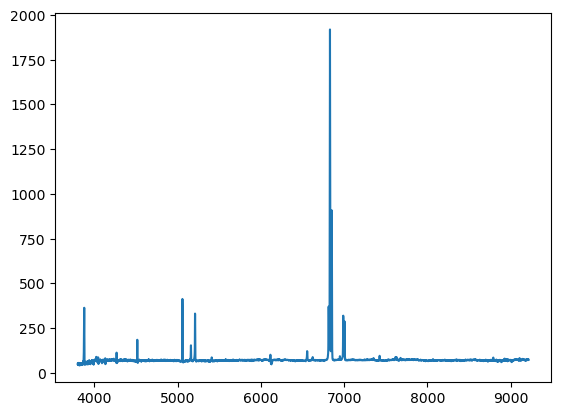

In [16]:
plt.plot(waves,spec)
plt.show()

<function matplotlib.pyplot.show(close=None, block=None)>

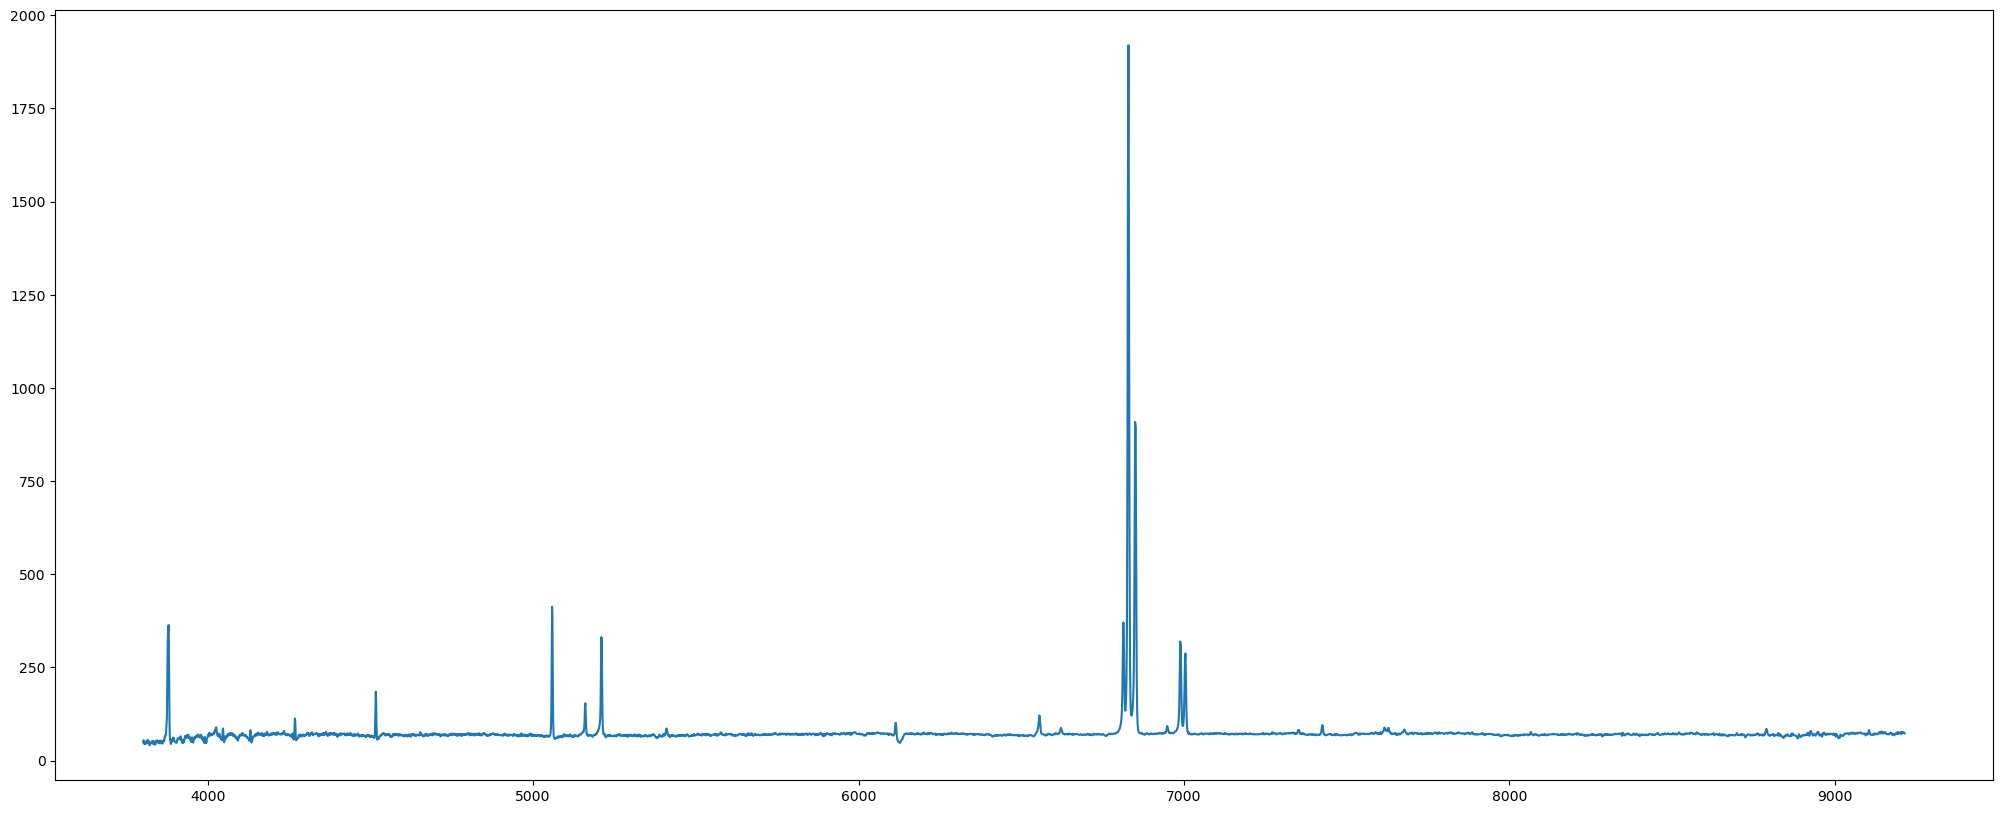

In [17]:
fig = plt.figure()
fig.set_size_inches(25, 10)
plt.plot(waves, spec)
plt.show

<function matplotlib.pyplot.show(close=None, block=None)>

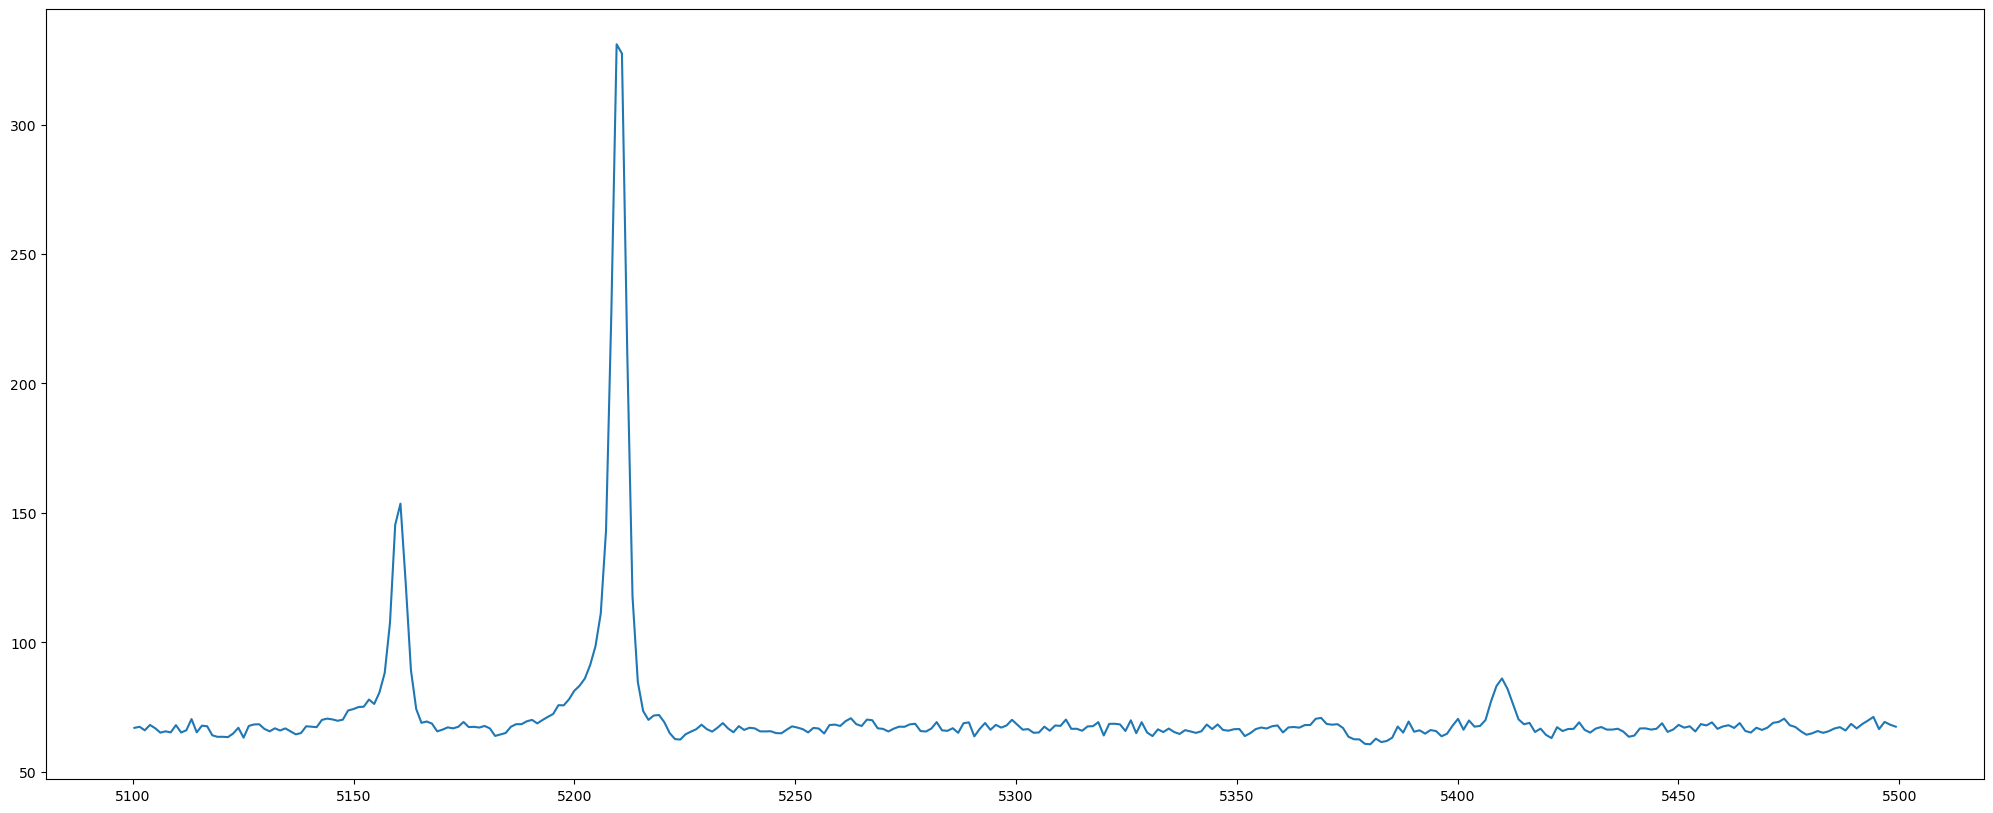

In [18]:
sub_i = np.where((waves>5100) & (waves <5500))
sub_spec = spec[sub_i]
sub_wave = waves[sub_i]

fig = plt.figure()
fig.set_size_inches(25, 10)
plt.plot(sub_wave, sub_spec)
plt.show

<function matplotlib.pyplot.show(close=None, block=None)>

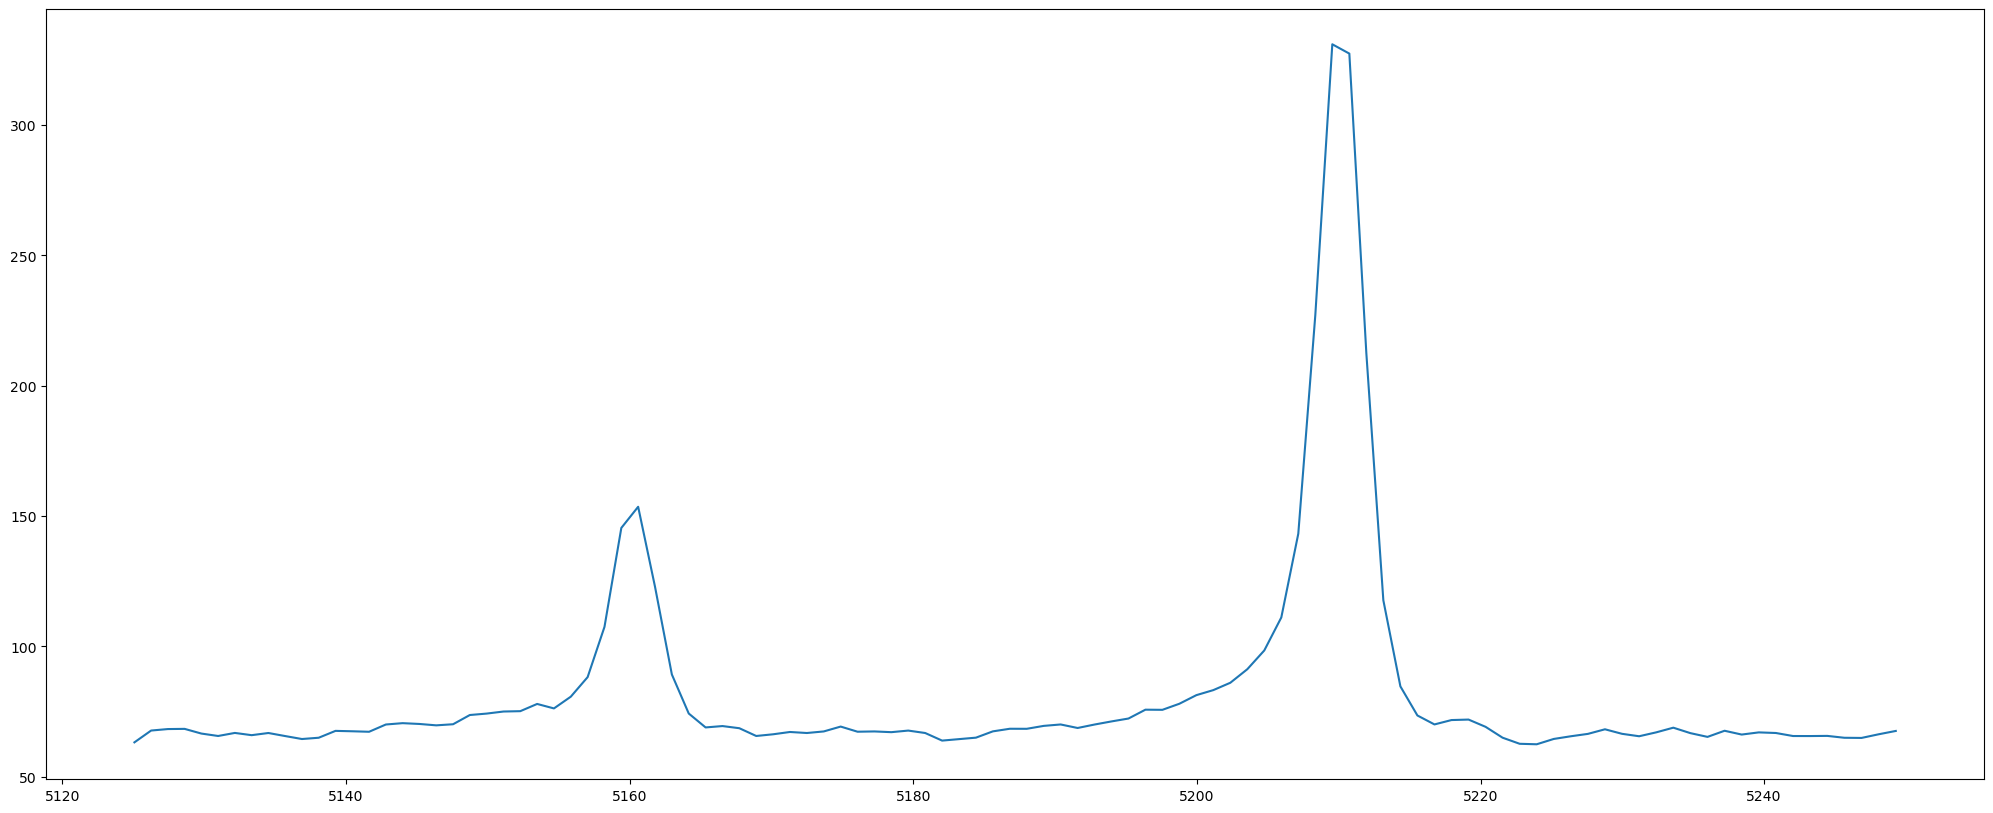

In [19]:
sub_i = np.where((waves>5125) & (waves <5250))
sub_spec = spec[sub_i]
sub_wave = waves[sub_i]

fig = plt.figure()
fig.set_size_inches(25, 10)
plt.plot(sub_wave, sub_spec)
plt.show

In [20]:
spec_peaks = scipy.signal.find_peaks(sub_spec, height=100)[0]
print(sub_wave[spec_peaks])

[5160.596  5209.5474]


Performing a least squares fit...
Printing out the best fitting parameters ad 1 std errors...
-------------------------------------
line 1 Amp: 363.1939682079529 Amp_err: 17.968282384207292

line 2 Amp: 1186.5218497378403 Amp_err: 21.560297576468304

line 1 Wavelength: 5160.180805910007 Mean_4959_err: 0.11542855159865227

line 2 Wavelength: 5210.025890054627 Mean_5007_err: 0.03549258534101276

line width: 1.7486290269833804 Sigma_err: 0.03468712981967058

Continuum level: 69.4461631658877 Cont_err: 0.6563358385020543

Plotting the observerd and modeled data...


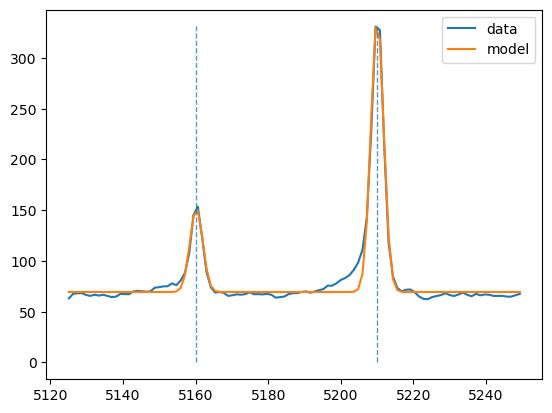

In [21]:
popt_, pcov_ = fit_data(sub_wave, sub_spec, 150, 330, *sub_wave[spec_peaks], 2.0, 4.0)

In [22]:
wv_4959_e = 4958.911
wv_5007_e = 5006.84

src_redshift1 = get_redshift(popt_[2], wv_4959_e)
print(src_redshift1)

src_redshift2 = get_redshift(popt_[3], wv_5007_e)
print(src_redshift2)

0.04058750114894311
0.04058166229690318


In [50]:
def ketidakpastian_redshift(lamo, lame, sigma_lamo):
    '''
    Menghitung ketidakpastian redshift berdasarkan ketidakpastian panjang gelombang terobservasi
    '''
    return sigma_lamo / lame

sigma_lam1 = np.sqrt(pcov_[2, 2]) 
sigma_lam2 = np.sqrt(pcov_[3, 3])

src_redshift1_ketidakpastian = ketidakpastian_redshift(popt_[2], wv_4959_e, sigma_lam1)
src_redshift2_ketidakpastian= ketidakpastian_redshift(popt_[3], wv_5007_e, sigma_lam2)

print(f'Redshift 1: {src_redshift1} ± {src_redshift1_ketidakpastian}')
print(f'Redshift 2: {src_redshift2} ± {src_redshift2_ketidakpastian}')


Redshift 1: 0.04058750114894311 ± 2.327699601760392e-05
Redshift 2: 0.04058166229690318 ± 7.0888195630403125e-06
